# Goal: 

Plot Mobile Clicks Over Time
<br>Null hypothesis: There is no change in click frequencies over time
<br>*Should be noted that clicks will likely decrease over time anyway because of dropout...solution...look at individual user clicks

***What have I done below?***
<br>-
<br>***What can we (gently) conclude from the data?***
<br>-

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
import datetime
from sklearn import preprocessing
from no_PII_Storage_folder import *

datetimeFormat = '%Y-%m-%d %H:%M:%S.%f %Z'

In [18]:
user_data_org = pd.read_csv(r'\ALL_DATA.csv')
mobile_data_org = pd.read_csv(r'MOBILE_DATA.csv')
non_mobile_data_org = pd.read_csv(r'NON_MOBILE_DATA.csv')

user_data_org = user_data_org.drop(['Unnamed: 0'], axis = 1)
mobile_data_org = mobile_data_org.drop(['Unnamed: 0'], axis = 1)
non_mobile_data_org = non_mobile_data_org.drop(['Unnamed: 0'], axis = 1)

In [19]:
user_data = user_data_org
mobile_data = mobile_data_org
non_mobile_data = non_mobile_data_org

user_data = user_data.dropna()
user_data = user_data.reset_index(drop=True)
mobile_data = mobile_data.dropna()
mobile_data = mobile_data.reset_index(drop=True)
non_mobile_data = non_mobile_data.dropna()
non_mobile_data = non_mobile_data.reset_index(drop=True)
print(len(non_mobile_data) + len(mobile_data))
print(len(user_data))


3384758
3329792


In [20]:
mobile_data = mobile_data.sort_values(by = "time", ascending = True)
mobile_data = mobile_data.reset_index()

non_mobile_data = non_mobile_data.sort_values(by = "time", ascending = True)
non_mobile_data = non_mobile_data.reset_index()

print(len(mobile_data))
#12/21/2016 - 7/2/2017

56044


In [21]:
#find top MOBILE users
NUM_TOP = 3
#no nan because lots of nans in names????
data_copy  = mobile_data.dropna()
data_copy = data_copy.reset_index(drop=True)

def get_top_users(df, NUM_TOP):
    user_counts = pd.DataFrame()
    user_counts  = df['username'].value_counts()
    user_counts = user_counts.reset_index()
    user_counts.columns = ['username', 'no. clicks']
    top_users = pd.DataFrame()
    for count in range(NUM_TOP):
        top_users[count] = user_counts.loc[count]
    return(top_users.T)

top_users = get_top_users(data_copy, NUM_TOP)

top_users.head(NUM_TOP)

,username,no. clicks
0,9589599fce0cecbe02eb2b02457b1ef6,2838
1,3693313ce79182c3009e6414b3ade459,2471
2,d39491d5e973c40e3b1e5957cce823ee,1893


In [22]:
temp = pd.DataFrame()
top_user = pd.DataFrame()

for count in range(len(top_users)):
    temp = mobile_data[mobile_data['username'].str.contains(top_users['username'][count])]
    top_user = pd.concat([temp, top_user], axis = 0, sort = False)

print(len(top_user))
#top_user = top_user.drop(['index'], axis = 0)
top_user = top_user.reset_index()
top_user.head(2)

7202


,level_0,index,time,username,event_source,agent,name
0,6677,42771,2017-03-14 00:38:47.213403 UTC,d39491d5e973c40e3b1e5957cce823ee,browser,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,page_close
1,16641,52646,2017-03-24 04:35:40.714393 UTC,d39491d5e973c40e3b1e5957cce823ee,browser,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,edx.ui.lms.sequence.next_selected


In [23]:
#make copy of the top users so that we can safely add a timestamp column
copy_top = top_user
timestamp_list = []

for num in range(len(copy_top)):
    timestamp_list.append(datetime.datetime.strptime(copy_top['time'][num], datetimeFormat))
copy_top['timestamp'] = timestamp_list
    
copy_top.head(3)

,level_0,index,time,username,event_source,agent,name,timestamp
0,6677,42771,2017-03-14 00:38:47.213403 UTC,d39491d5e973c40e3b1e5957cce823ee,browser,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,page_close,2017-03-14 00:38:47.213403
1,16641,52646,2017-03-24 04:35:40.714393 UTC,d39491d5e973c40e3b1e5957cce823ee,browser,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,edx.ui.lms.sequence.next_selected,2017-03-24 04:35:40.714393
2,16642,52644,2017-03-24 04:35:42.252965 UTC,d39491d5e973c40e3b1e5957cce823ee,browser,Mozilla/5.0 (iPad; CPU OS 10_2_1 like Mac OS X...,page_close,2017-03-24 04:35:42.252965


In [24]:
copy_top['week_year'] = copy_top['timestamp'].apply(lambda x: "%d/%d" % (x.week, x.year))
#copy_top.groupby(['week_year']).size()

top_user_week_grouped = top_user.groupby(['username'])
top_user_week_counts = top_user_week_grouped.week_year.value_counts()
top_user_week_counts.columns = ['week_year', 'count', 'username']
top_user_week_counts = top_user_week_counts.to_frame(name = "username")
top_user_week_counts.columns = ['count']
top_user_week_counts = top_user_week_counts.sort_values(by = 'week_year', ascending = True)
top_user_week_counts = top_user_week_counts.reset_index()
#top_user_week_counts = top_user_week_counts.groupby(['username'])

print(len(top_user_week_counts))
top_user_week_counts.head(4)

32


,username,week_year,count
0,9589599fce0cecbe02eb2b02457b1ef6,10/2017,172
1,3693313ce79182c3009e6414b3ade459,10/2017,14
2,3693313ce79182c3009e6414b3ade459,11/2017,568
3,d39491d5e973c40e3b1e5957cce823ee,11/2017,1


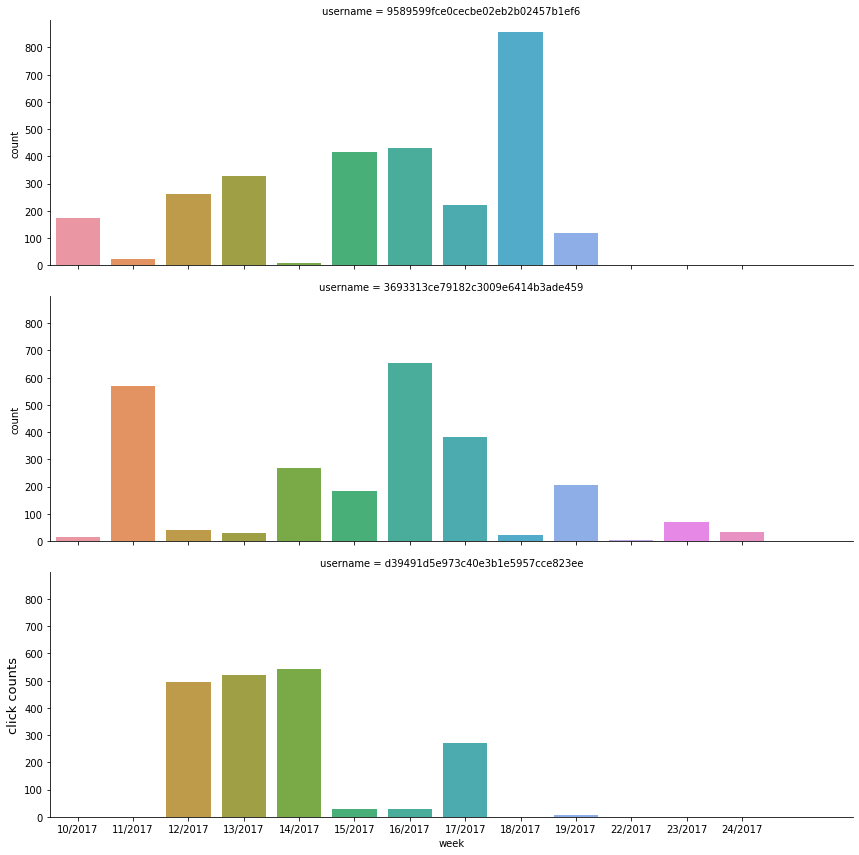

In [26]:
sns.catplot(x = "week_year", y = "count", col_wrap = 1, 
            col = "username", data = top_user_week_counts, kind = "bar",
            height = 4, aspect = 3)
# plt.title("Counts over time for mobile user " + str(top_user_week_counts['username'][count]), fontsize = 14)
plt.xlabel('week', fontsize = 10)
plt.ylabel('click counts', fontsize = 13)
plt.xlim(-.50,14)
plt.show()